In [1]:
import math
ln2 = math.log(2)
def ln2over(t):
    return ln2/t
import numpy as np
import matplotlib.pyplot as plt

In [4]:
times = np.append(np.arange(-10,30),np.arange(30,135,5))
thiscp = np.asarray([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
        169,  338,  508,  677,  846, 1146, 1509, 1872, 2235, 2598, 2825,
       2916, 2791, 2422, 2052, 1901, 1774, 1648, 1521, 1449, 1396, 1343,
       1291, 1238, 1193, 1150, 1106, 1063, 1019,  976,  926,  880,  834,
        792,  750,  709,  695,  682,  670,  657,  644,  632,  621,  611,
        600,  590,  580,  570,  559,  553])

In [5]:
ec50 = 600
n = 7
k = ln2over(28)

In [18]:
def Ce(t,k,Cptimes,Cpsamples,Ce0=None):
    """ Returns a numpy vector Ce(t), where
    t = numpy vector of times at which Ce is to be computed
    k = effect site rate constant (a.k.a. k_e or k_e0).
    Meant to be called once.
    """
    if k<0 or Cptimes.size==0 or Cpsamples.size==0:
        return np.full_like(t, np.nan, dtype=np.float_)
    if Ce0 == None:
        Ce0 = Cpsamples[0]
    working  = np.full_like(t, np.nan, dtype=np.float_) # will stay NaN at any t values out of range
    for i in range(Cptimes.size-1):
        if i == 0:
            Ceti = Ce0  # "Ceti" means Ce(t_i)
            working[t==Cptimes[0]]=Ce0 # set Ce for any value of t == exactly the start time
        else:
            Ceti = temp
        def m(i):  # scalar
            return (Cpsamples[i+1]-Cpsamples[i])/(Cptimes[i+1]-Cptimes[i])
        xx = Cpsamples[i] - m(i)/k  # for convenience below
        # find elements with t in (t_i, t_{i+1}]
        indexi = np.logical_and(t>Cptimes[i], t<=Cptimes[i+1])
        # set those elements based on Ce(t_i)
        working[indexi] = xx + m(i)*(t[indexi]-Cptimes[i]) + \
            (Ceti-xx)*np.exp(-k*(t[indexi]-Cptimes[i]))
        # compute Ce(t_{i+1}) ("temp") and increment i:
        temp = xx + m(i)*(Cptimes[i+1]-Cptimes[i]) + (Ceti-xx)*math.exp(-k*(Cptimes[i+1]-Cptimes[i]))
    return working

In [19]:
ces = Ce(times, k, times, thiscp)
ces

array([   0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    2.0746643 ,
          8.23087973,   18.38112294,   32.42763366,   50.26296761,
         73.40265465,  104.08534787,  142.89365051,  189.62888038,
        244.09721336,  304.44001223,  367.18825364,  427.97564698,
        481.22491296,  524.13733488,  559.64195766,  590.88091604,
        618.26299312,  641.88239402,  662.49413263,  681.07463476,
        697.9048964 ,  713.03998945,  726.52126218,  738.47518648,
        749.06106222,  758.32441442,  766.29768145,  773.01230676,
        778.49916674,  798.52211881,  810.63047034,  815.97370178,
        815.57707262,  810.33687464,  800.87642007,  789.34817136,
        777.59156698,  765.74961516,  753.82985117,  741.7843234 ,
        729.68708538,  717.66057987,  705.81299451,  694.12109787,
        682.56916538,  671.19791276,  659.98630482,  648.85634

In [20]:
ces.dtype

dtype('float64')

In [21]:
temp = np.full_like(times, np.nan)
temp.dtype

dtype('int32')

In [32]:
okay = np.where(ces!=0)
fixdivby0 = np.zeros_like(ces)
fixdivby0[okay] = 1/(1+ (ec50/ces[okay])**n)

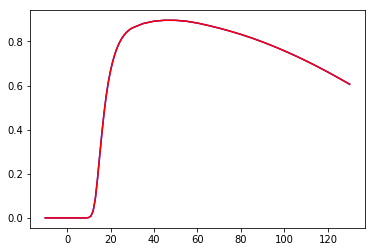

In [36]:
plt.plot(times, ces**n/(ces**n+ ec50**n), 'b-')
plt.plot(times, fixdivby0, 'r-')
plt.show()

In [ ]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Time in minutes from start of loading dose')
ax1.set_ylabel('[LD], ng/ml')
ax1.plot(Cptimes, Cpsamples,'ko-',label='Cp(t)')
ax1.legend(loc=(1.15,0.9))

ax2 = ax1.twinx()  # instantiate a second "axes" that shares the same x-axis
ax2.set_ylabel('Fractional effect')
for i in reversed(range(len(stages))):
#for i in (range(len(stages))):
#for i in [2]:
    ces = Ce(times, keqs[i], times, thiscp)
    effects = effect(ces,ec50s[i],hillns[i])
    peakwhere = np.abs(times-20.0)<0.5
    if debug3:
        print('t1/2alpha = {}, ec50 = {}, n = {}, Ce(20.0) = {}, effect(20.0) = {}'.format(
            ln2over(keqs[i]),ec50s[i],hillns[i], ces[peakwhere], effects[peakwhere]))
    #plt.axis((0,120,0,3500))
    ax2.plot(times, effects, color=colors[i], linestyle=lines[i],
             label='effect, H&Y {}'.format(stages[i]))
    #ax2.plot(times, 1/(1+ (ec50s[i]/ces)**hillns[i]), 'r-')
    #ax2.plot(times, (ces**hillns[i])/((ces**hillns[i])+ ec50s[i]**hillns[i]), 'b-')
ax2.legend(loc=(1.15,0.4))
ax2.yaxis.label.set_color(colors[3])
ax2.tick_params(axis='y',colors=colors[3])
ax2.spines['right'].set_color(colors[3])
plt.show()
fig.savefig('test.png', dpi=600, transparent=True, bbox_inches="tight")
plt.close()